In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# importing necessary libaries

In [100]:
train = pd.read_csv(r'C:\Users\PREM\Downloads\train.csv')#importing the dataset

# Understand different features in the train dataset

In [101]:
train.head()#checking the first 5 rows of dataset

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [102]:
train.shape#checking how many rows and columns in dataset

(13994, 30)

In [103]:
train.info()#checking the dataset information colm names colm type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [104]:
train.columns#displaying the columns names

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [105]:
train.describe()#The describe method is used for calculating statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


# EDA

In [106]:
# Missing Value Analysis

In [107]:
missing_values = train.isnull().sum()

In [108]:
print(missing_values)

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [109]:
# Data Visualization

In [110]:
# Histograms of numerical features

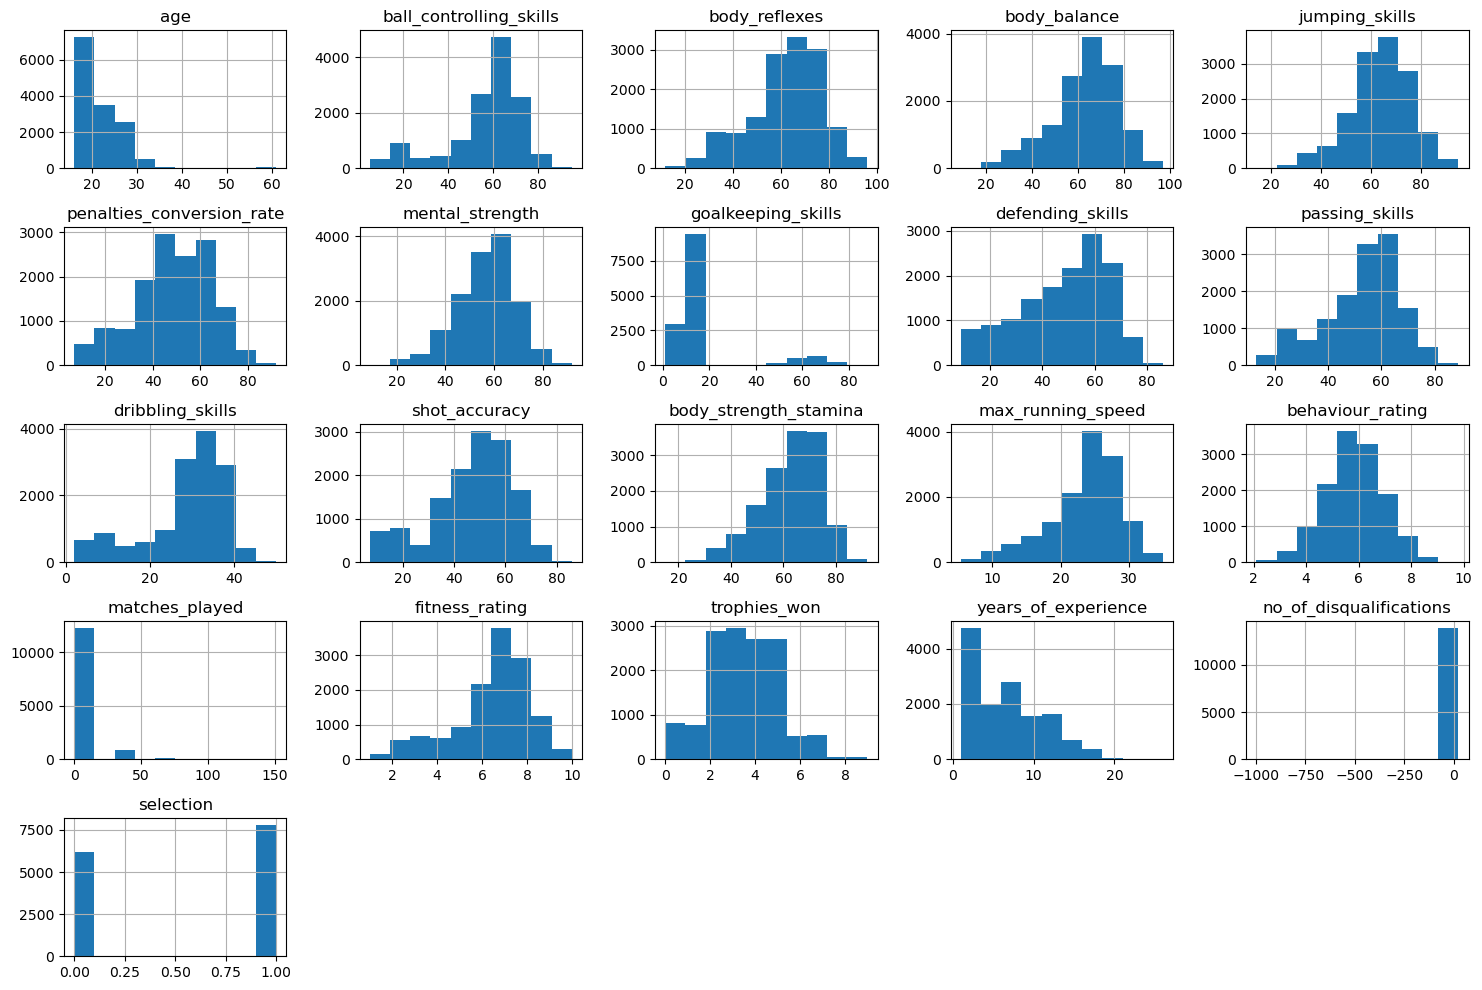

In [111]:
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [112]:
#To show the distribution of values for each numerical feature.
#Histograms help you see how values are spread out across different ranges. They show which values are more common and which are less common. If the histogram is skewed to one side, it means that most values are concentrated in that direction

In [113]:
# Box plots to visualize outliers

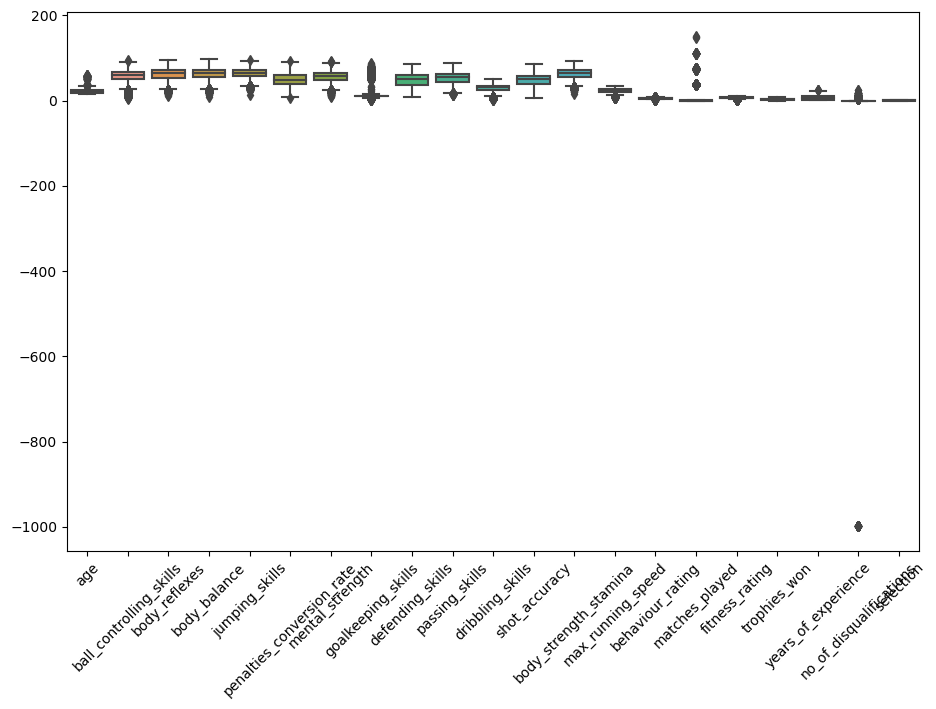

In [114]:
plt.figure(figsize=(11, 7))
sns.boxplot(data=train.drop(["player_id", "name"], axis=1))
plt.xticks(rotation=45)
plt.show()

In [115]:
#To identify if there are any values that are significantly different from the rest (outliers) in numerical features.
#A box plot shows the distribution of a feature's values. The box represents the range where most values are, and points outside the box are potential outliers. Outliers are values that are much higher or lower than the rest, and they might be worth investigating further.

In [116]:
# Correlation heatmap

C:\Users\PREM\AppData\Local\Temp\ipykernel_5060\2672588138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


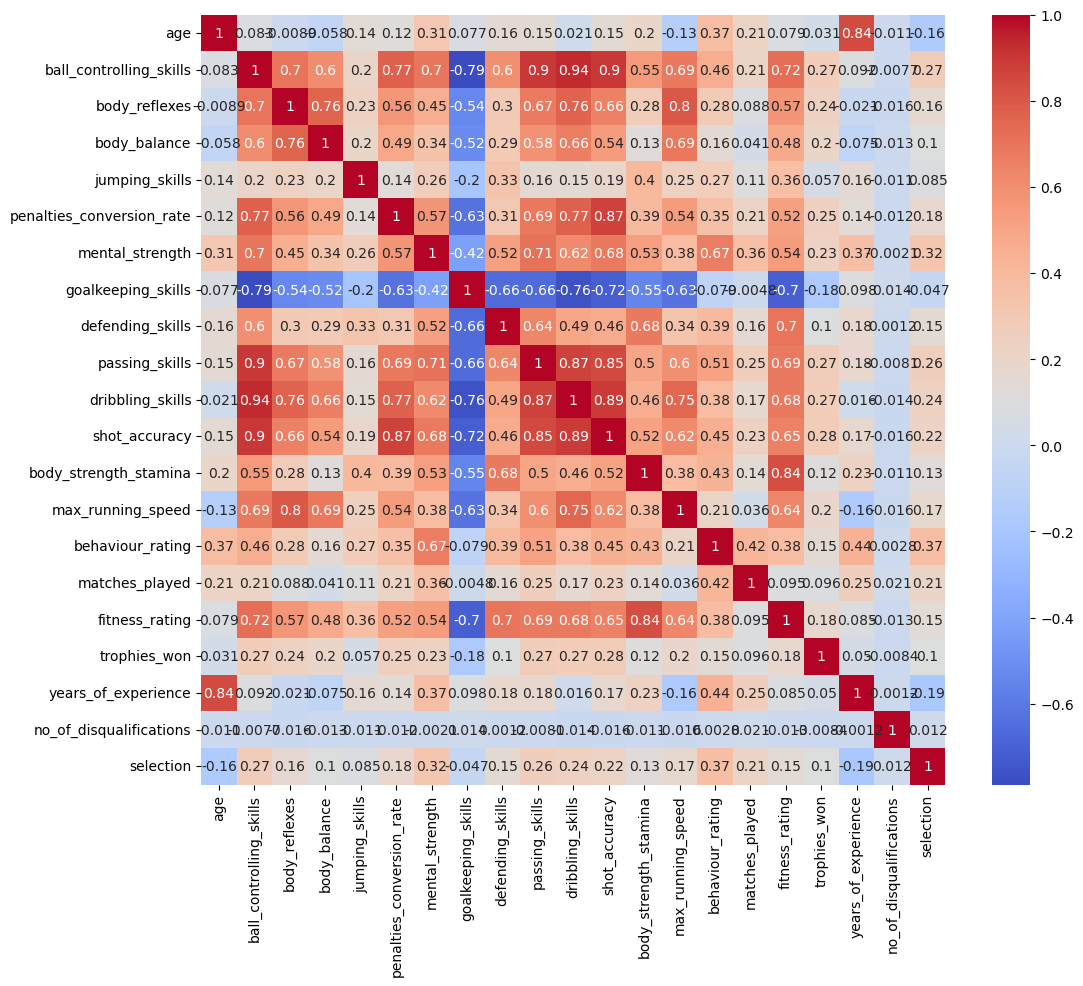

In [117]:
correlation_matrix = train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [118]:
#To visualize how different numerical features are related to each other.
# The heatmap uses colors to show the strength and direction of relationships between features. Positive values indicate positive correlation (as one goes up, the other goes up), while negative values indicate negative correlation (as one goes up, the other goes down). Darker colors indicate stronger correlations.

In [119]:
# Bar plot for gender distribution

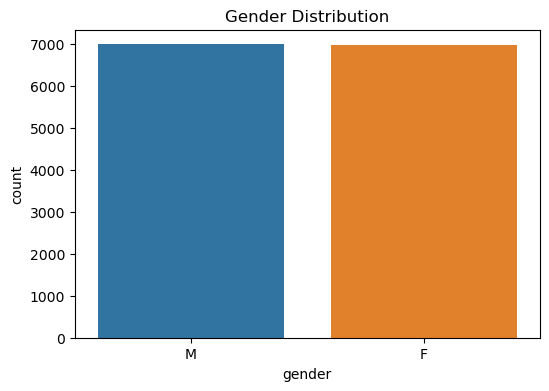

In [120]:
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=train)
plt.title("Gender Distribution")
plt.show()

In [121]:
#To show how many players are of each gender.
#The bar plot displays the count of male and female players. The taller bar indicates the more common gender. This helps you understand the gender distribution in your dataset.

In [122]:
# Scatter plot: Age vs. Fitness Rating

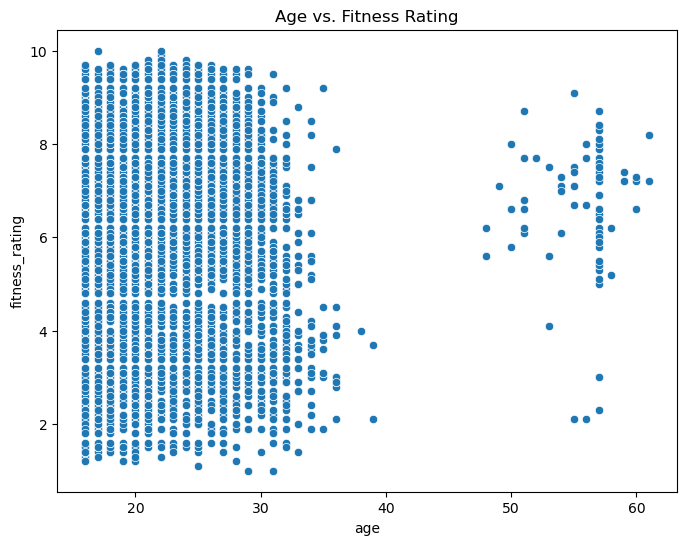

In [123]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="fitness_rating", data=train)
plt.title("Age vs. Fitness Rating")
plt.show()

In [124]:
#o see if there's a relationship between age and fitness rating.
# Each point on the scatter plot represents a player. The position of the point shows the player's age on the x-axis and fitness rating on the y-axis. If points tend to move in a certain direction (up or down) as age changes, it indicates a relationship between age and fitness rating.

In [125]:
# Scatter plot to explore relationships

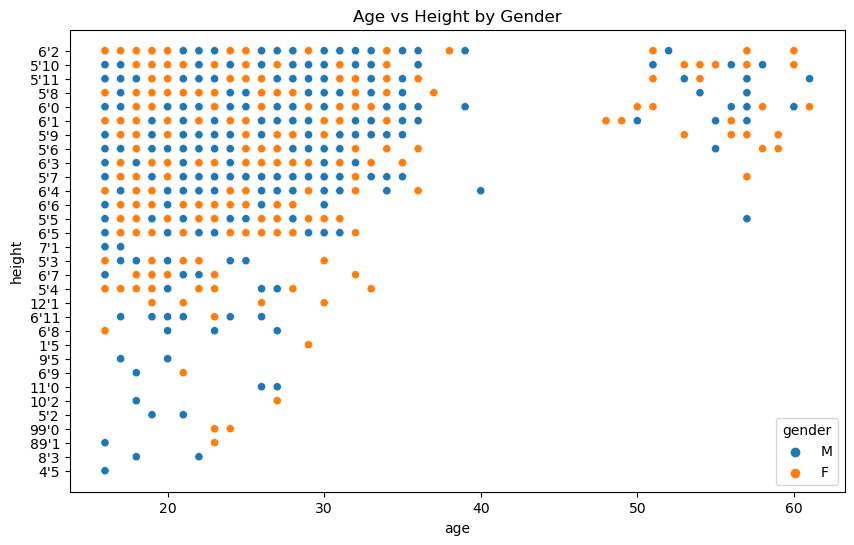

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='height', hue='gender', data=train)
plt.title('Age vs Height by Gender')
plt.show()

In [127]:
#the scatter plot visually represents how age and height relate to each other among different genders of players. It can help you quickly identify any potential trends or differences in these attributes within your dataset.

In [128]:
#pair plot

In [129]:
selected_columns = ['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes', 'goalkeeping_skills']

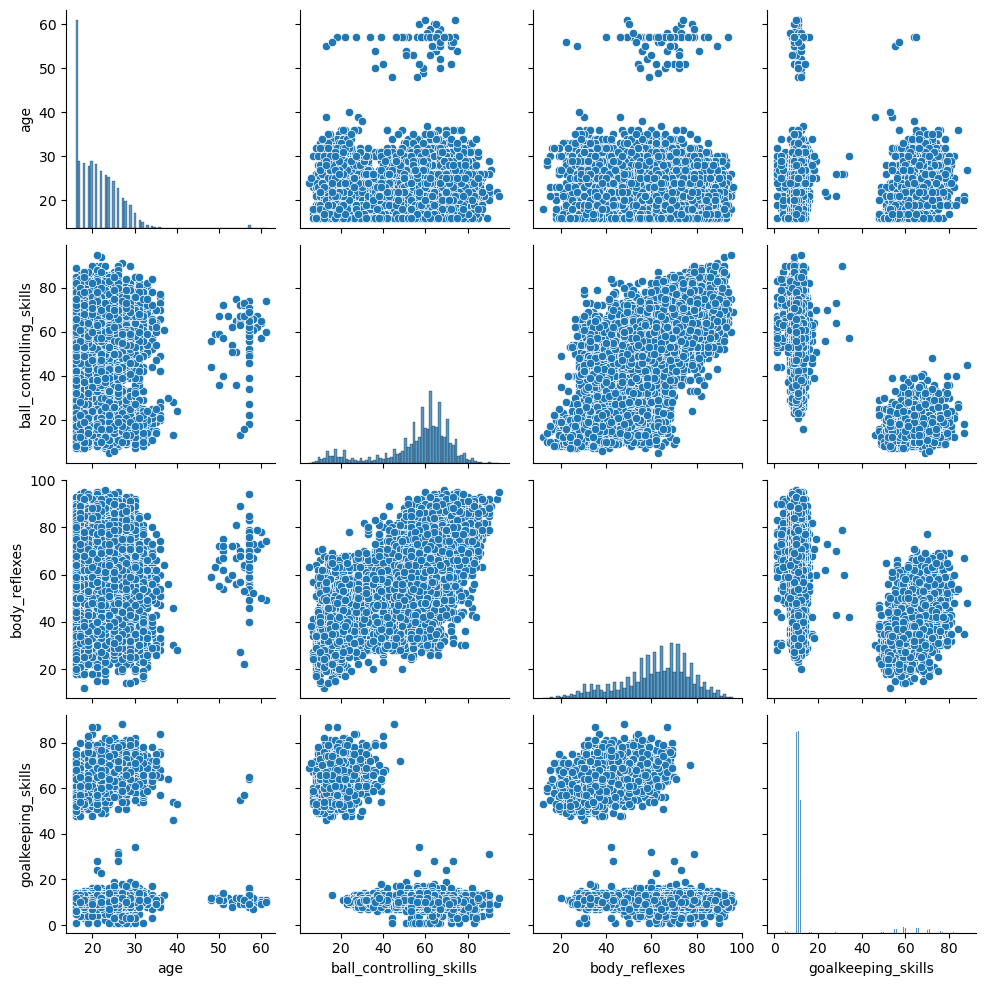

In [130]:
sns.pairplot(train[selected_columns])
plt.show()

In [131]:
#Pair plots are  useful when you have multiple numerical attributes, as they allow you to gain insights into various attribute interactions all at once.
#By looking at the scatter plots, you can quickly spot any patterns, correlations, or potential outliers between pairs of attributes

In [132]:
# Target Distribution

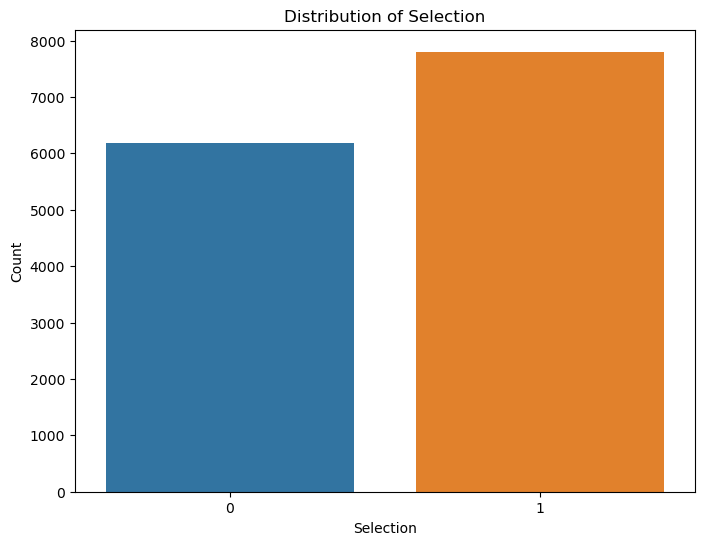

In [133]:
plt.figure(figsize=(8, 6))
sns.countplot(x="selection", data=train)
plt.title("Distribution of Selection")
plt.xlabel("Selection")
plt.ylabel("Count")
plt.show()

In [134]:
#This plot shows the distribution of the target variable, "selection."
#This plot helps you understand how balanced or imbalanced your target classes are.

In [135]:
# Numerical Features vs. Target

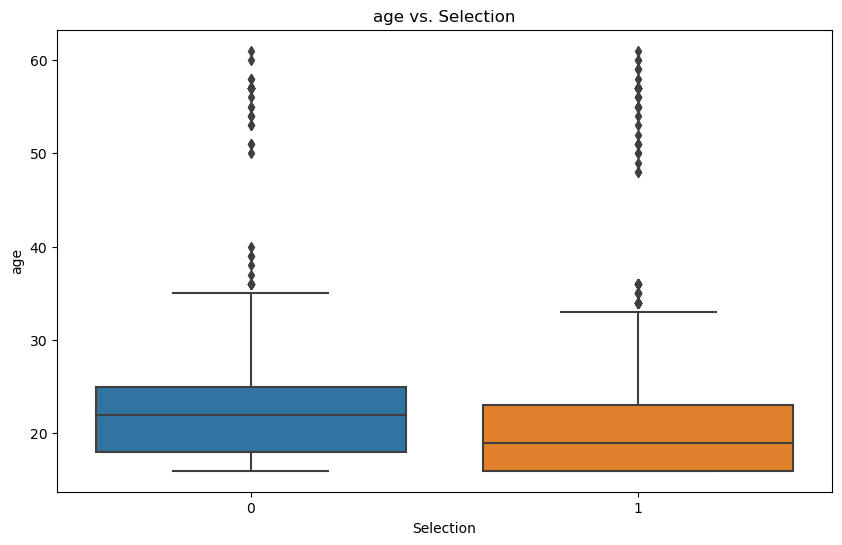

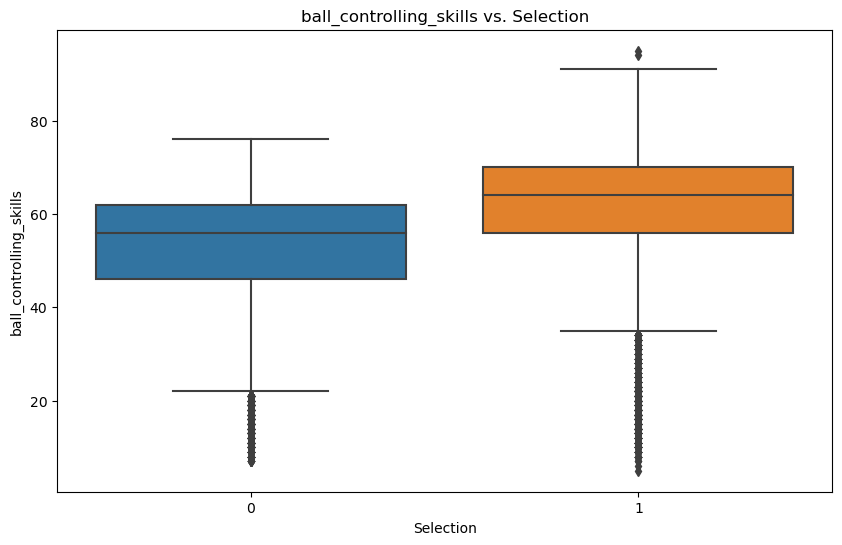

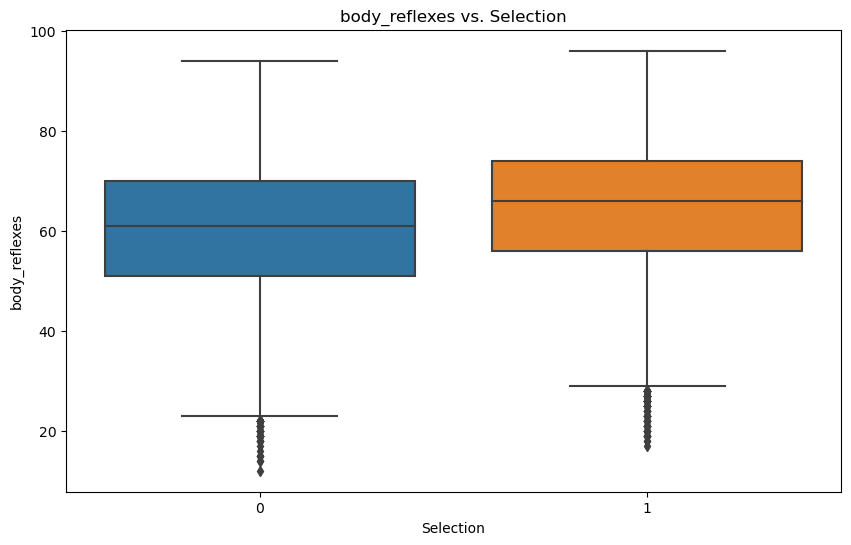

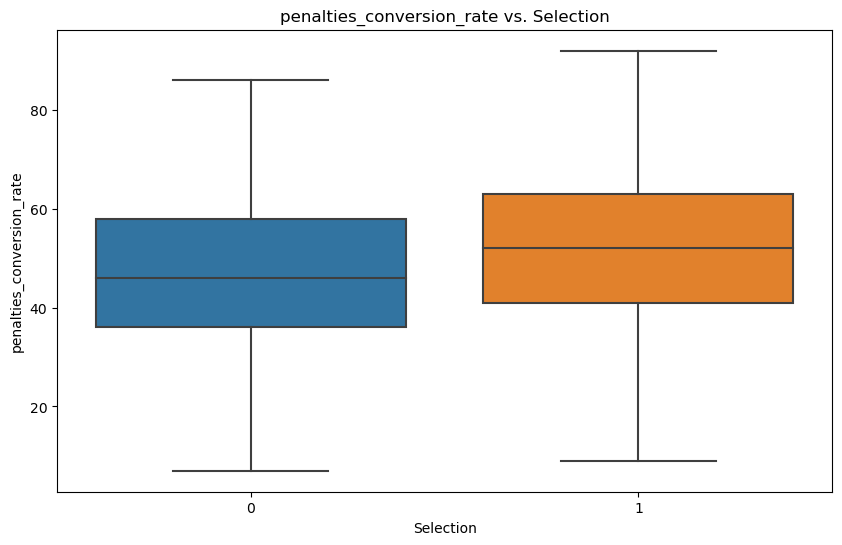

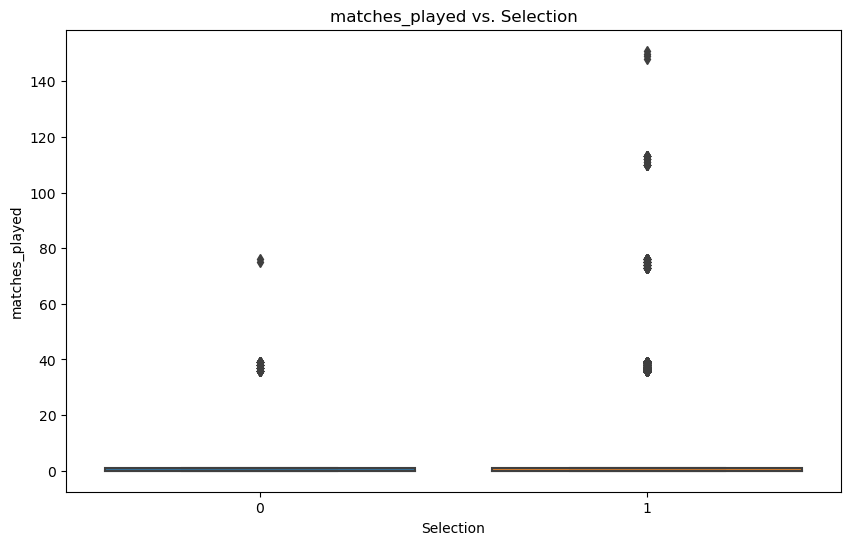

In [136]:
numerical_features = ["age", "ball_controlling_skills", "body_reflexes", "penalties_conversion_rate", "matches_played"]
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="selection", y=feature, data=train)
    plt.title(f"{feature} vs. Selection")
    plt.xlabel("Selection")
    plt.ylabel(feature)
    plt.show()

In [137]:
#these plots compare the distribution of numerical features for different values of the target, "selection."
#Box plots show the median, quartiles, and possible outliers in the data

In [138]:
# Categorical Features vs. Target

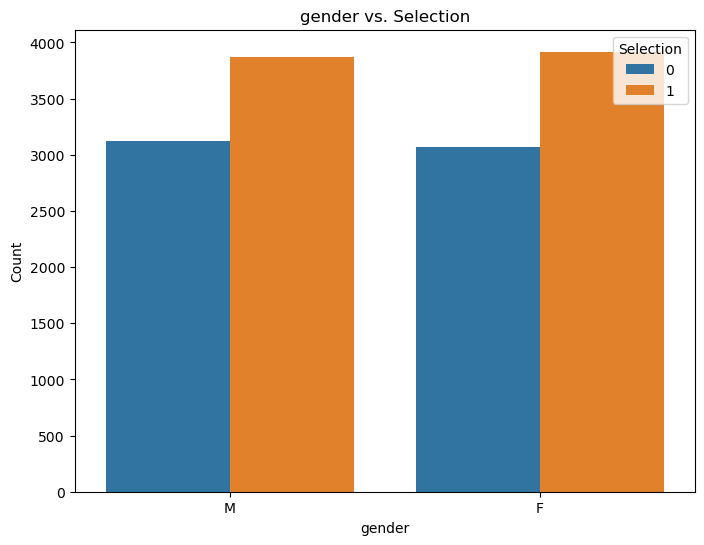

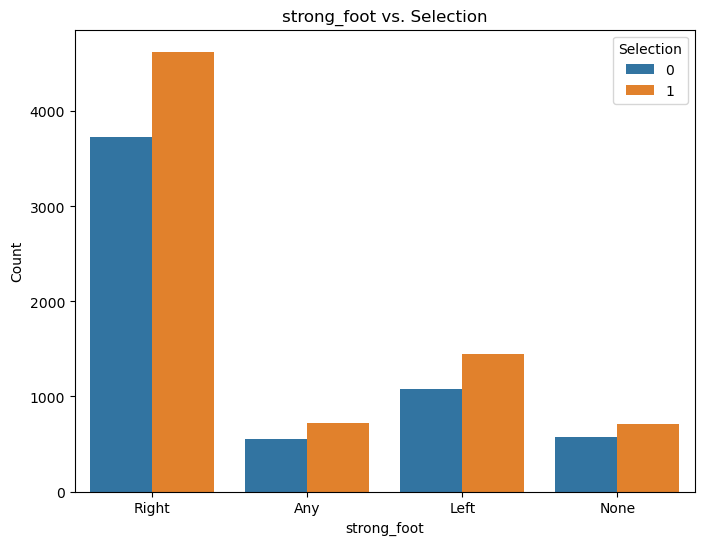

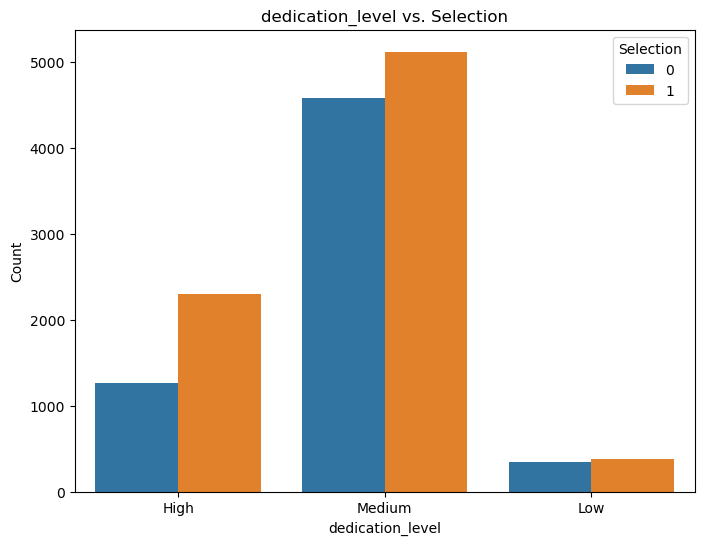

In [139]:
categorical_features = ["gender", "strong_foot", "dedication_level"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue="selection", data=train)
    plt.title(f"{feature} vs. Selection")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Selection", loc="upper right")
    plt.show()

In [140]:
#These plots show the distribution of categorical features for different values of the target, "selection."
#These plots help you see if certain categories are more common in one "selection" value than the other.

# preprocessing

In [141]:
# Convert height and weight to numerical values
train["height"] = train["height"].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]))
train["weight"] = train["weight"].str.extract("(\d+)").astype(float)

In [142]:
# Impute missing values with the mean for numerical features

In [143]:
numerical_features = ["age","weight","shot_accuracy","behaviour_rating", "ball_controlling_skills", "jumping_skills", "penalties_conversion_rate",
                      "mental_strength", "matches_played", "fitness_rating", "years_of_experience"]
for feature in numerical_features:
    train[feature].fillna(train[feature].mean(), inplace=True)

In [144]:
# Impute missing values with the mode for categorical features

In [145]:
categorical_features = ["gender", "strong_foot", "coaching","dedication_level"]
for feature in categorical_features:
    mode_value = train[feature].mode()[0]
    train[feature].fillna(mode_value, inplace=True)

In [146]:
train.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [147]:
# Visualize Outliers with Box Plots

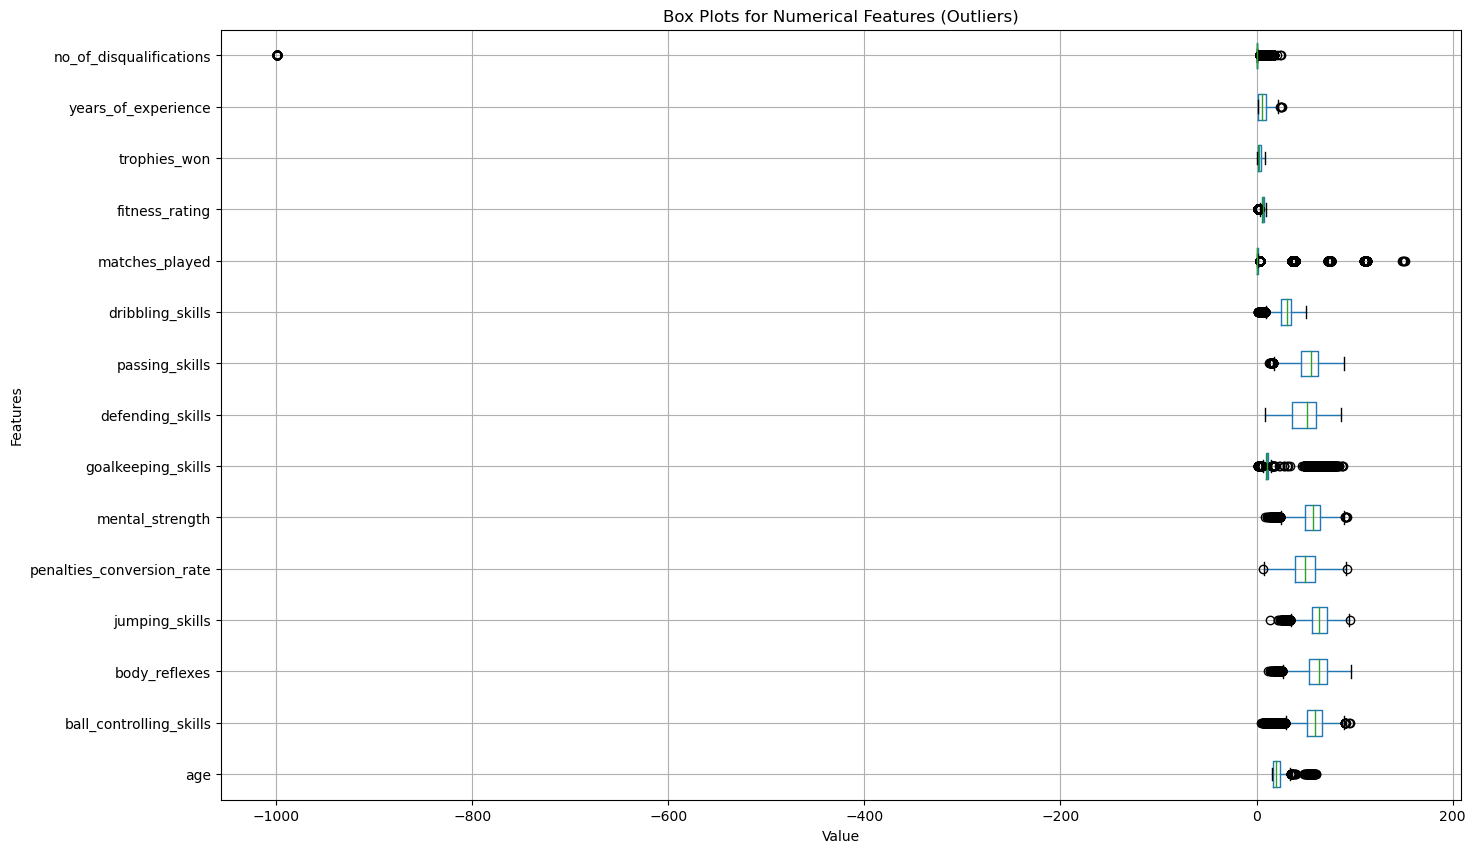

In [148]:
numerical_features = ["age", "ball_controlling_skills", "body_reflexes", "jumping_skills", 
                      "penalties_conversion_rate", "mental_strength", "goalkeeping_skills",
                      "defending_skills", "passing_skills", "dribbling_skills", "matches_played",
                      "fitness_rating", "trophies_won", "years_of_experience", "no_of_disqualifications"]

plt.figure(figsize=(16, 10))
train[numerical_features].boxplot(sym="o", vert=False, widths=0.5)
plt.title("Box Plots for Numerical Features (Outliers)")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()

In [149]:
#The central line within the box represents the median value.
#The top and bottom edges of the box represent the third and first quartiles (Q3 and Q1).
#The "whiskers" extend to the minimum and maximum non-outlier values within a certain range.

In [181]:
#Log transformation

In [182]:
#Apply transformations such as log, square root, or reciprocal to normalize the data and mitigate the impact of outliers.
#Transformation can make the distribution more symmetric and reduce the influence of extreme values.

In [150]:
numerical_features = ["age", "ball_controlling_skills", "body_reflexes", "jumping_skills", 
                      "penalties_conversion_rate", "mental_strength", "goalkeeping_skills",
                      "defending_skills", "passing_skills", "dribbling_skills", "matches_played",
                      "fitness_rating", "trophies_won", "years_of_experience", "no_of_disqualifications"]

In [151]:
for feature in numerical_features:
    train[feature] = np.log1p(train[feature])  # Apply log transformation

E:\Anaconda\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


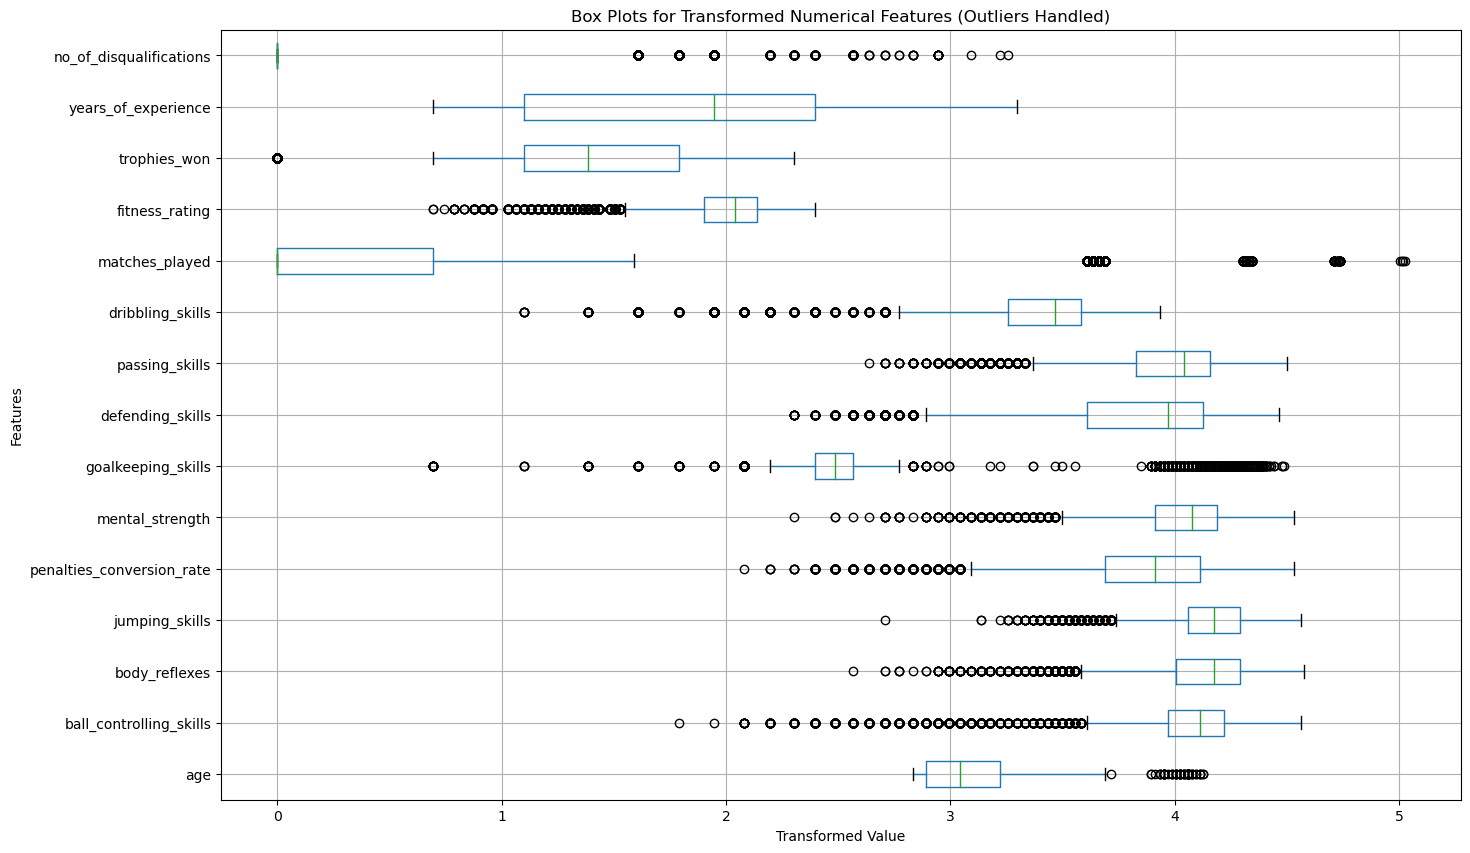

In [152]:
#outliers handle
plt.figure(figsize=(16, 10))
train[numerical_features].boxplot(sym="o", vert=False, widths=0.5)
plt.title("Box Plots for Transformed Numerical Features (Outliers Handled)")
plt.xlabel("Transformed Value")
plt.ylabel("Features")
plt.show()

In [153]:
# Convert Categorical Features using One-Hot Encoding

In [154]:
# Convert Categorical Features using One-Hot Encoding
train_encoded = pd.get_dummies(train, columns=categorical_features)

In [155]:
# Drop non-numeric columns before scaling
non_numeric_columns_to_drop = ["player_id", "name"]
train_encoded.drop(non_numeric_columns_to_drop, axis=1, inplace=True)


In [172]:
# Splitting data into training and testing sets
X = train.drop(["selection"], axis=1)  # Features
y = train["selection"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [177]:
#rANDOM FOREST
model = RandomForestClassifier(random_state=42)

In [179]:
# Train the model on the training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'PLID_18489'

In [183]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


ValueError: could not convert string to float: 'PLID_8570'

In [184]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


NameError: name 'y_pred' is not defined

In [185]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

NameError: name 'accuracy' is not defined